#  The (Linear) Kalman Filter
These equations are fully general. Understanding the formal equations (and the many different nomenclature conventions) is possibly the biggest barrier to understanding this tool

## State Transition Model

$$ \pmb{x}_t = \pmb{A_t}\pmb{x_{t-1}} + \pmb{B_t}\pmb{u_t} + \pmb{\epsilon_t} $$

* Statistical model of time evolution of state variables $\pmb{x} = \langle x_1,x_2, ... x_n \rangle$ (with zero mean Gaussian noise $\pmb{\epsilon}_t$)

* $\pmb{B_t}\pmb{u_t}$ represents "control" signals, ad-hoc changes to state variables, you could also just call it $\pmb{b}$ (as in the constant term for a linear model)

### Corresponding probability distribution is Gaussian with mean described by above equation and covariance $\pmb{Q}_t$
$$ p(\pmb{x}_t | \pmb{x}_{t-1}, \pmb{u}_{t}) = \mathcal{N}(\pmb{A}_t\pmb{x}_{t-1} + \pmb{B}_t\pmb{u}_t,\pmb{Q}_{t}) $$

* $\pmb{Q}$ is the "process noise"


## Observations Model

$$ \pmb{z}_t = \pmb{C_t}\pmb{x}_t + \pmb{\delta}_t $$

 * Statistical model relating observed variables $\pmb{z} = \langle z_1,z_2, ... z_k \rangle$ and state variables $\pmb{x} = \langle x_1,x_2, ... x_n \rangle$ (with zero mean Gaussian noise $\pmb{\delta_t}$)
 * Note that number of observed variables does not need to match number of state variables


### Corresponding probability distribution is Gaussian with mean ($\pmb{C_t}\pmb{x}_t$) and covariance $\pmb{R}_t$
$$ p(\pmb{z}_t | \pmb{x}_t) = \mathcal{N}(\pmb{C}_{t}\pmb{x}_{t},\pmb{R}_{t}) $$

* $\pmb{R}$ is the "observation error"

# Recursive Filter Equations

## Definitions
* Baysian belief (probability distibution) about state vector at time $t$ ($\pmb{x}_t$) is
$$bel(\pmb{x}_t) = \mathcal{N}(\pmb{\mu}_t,\pmb{\Sigma}_t)$$


## Prediction step

$$\bar{\pmb{\mu}}_t = \pmb{A_t}\pmb{\mu}_{t-1} + \pmb{B_t}\pmb{u}_t$$
$$\bar{\pmb{\Sigma}}_t = \pmb{A_t}\pmb{\Sigma}_{t-1}\pmb{A_t}^T + \pmb{Q_t}$$

* What "should" happen to the system according to the state transition model
* Overbar ($\bar{\pmb{\mu}}$,$\bar{\pmb{\Sigma}}$) here means "prior" (as in the Baysian prior)
  
## Kalman Gain

$$\pmb{K_t} = \bar{\pmb{\Sigma}}_t\pmb{C_t}^T(\pmb{C_t}\bar{\pmb{\Sigma}}_t\pmb{C_t}^T+\pmb{R}_t)^{-1} $$

* Relates the uncertainty from the prediction step ($\Sigma$) to the observation uncertainty $\pmb{R}_t$
* Called "gain" because larger $K$ means observations have greater effect on $\pmb{\mu}$ and $\pmb{\Sigma}$ in correction step

## Correction Step

$$\pmb{\mu}_t = \bar{\pmb{\mu}}_t + \pmb{K_t}(z_t - \pmb{C_t}\bar{\pmb{\mu}}_t)$$
$$\pmb{\Sigma_t} = (\pmb(I) - \pmb{K}_t\pmb{C}_t)\bar{\pmb{\Sigma}}_t$$

# A Simple, but Nontrivial Example

[Based on this example from Wikipedia](https://en.wikipedia.org/wiki/Kalman_filter#Example_application,_technical)


Tracking speed and velocity of a vehicle on rails (rails make this a 1D problem)

* There are 2 state variables, speed and velocity so:

$$\pmb{x} = \begin{bmatrix}x\\v\end{bmatrix}$$

* For state transition model we assume the rails can be treated as straight and frictionless

$$\pmb{A} = \begin{bmatrix}1 & \Delta t \\ 0 & 1 \end{bmatrix}$$

* Meaning the state transition equations are:

$$ \begin{align} x_t &= x_{t-1} + v_{t-1}\Delta t + \epsilon_{t,x}\\ v_t &= v_{t-1} + \epsilon_{t,v} \end{align} $$

* *Deriving* the process uncertainty matrix from the relationships between the state variables, in terms of the standard deviations of the state variables (e.g. $\sigma_x,\sigma_v$) is possible, but for the example, physically model the uncertainty as random accelerations $a_t \sim \mathcal{N}(0,\sigma_a^2)$ (maybe turbulent wind)

* In this case the state equations (including the error model) are:

$$ \begin{align} x_t &= x_{t-1} + v_{t-1}\Delta t + \frac{1}{2}a_t\Delta t^2 \\ v_t &= v_{t-1} + a_t \Delta_t \end{align} $$

* So the error model is:
 
$$ \begin{align} \pmb{\epsilon_t} &= \begin{bmatrix} \frac{1}{2}\Delta t^2 \\ \Delta t \end{bmatrix} a_t \\ &= \pmb{G} a_t \end{align}$$

* Applying the definitition of the covariance:

$$ \begin{align} Var(\pmb{\epsilon}_t) &= \mathbb{E}[\pmb{\epsilon}_t \pmb{\epsilon}_t^T] - \mathbb{E}[\pmb{\epsilon}_t]\mathbb{E}[\pmb{\epsilon}_t]^T \\ &= \mathbb{E}[\pmb{\epsilon}_t \pmb{\epsilon}_t^T] \\ &= \pmb{G}\pmb{G}^T \sigma_a^2 \end{align} $$

* So the process covariance matrix is

$$ \pmb{Q_t} = \begin{bmatrix} \frac{1}{4}\Delta t^4 & \frac{1}{2}\Delta t^3 \\ \frac{1}{2}\Delta t^3 & \Delta t^2 \end{bmatrix} \sigma_{a}^2$$

* Assume we have a tracking technology which can only measure the position of the vehicle and is accurate to within an uncertainy of $\sigma_z$ so:

$$z_t = x_t + \delta_t$$
$$\delta_t \sim \mathcal{N}(0,\sigma_z^2)$$

* Then the observation covariance is just:
  
$$R_t = \sigma_z^2$$

* And the matrix mapping state variables to observation variables is:

$$\pmb{C_t} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import kalman_train
X0 = 0
V0 = 5
SIGMA_A = 6
SIGMA_Z = 10

simulated_train = kalman_train.Process(X0,V0,SIGMA_A)
simulated_measurements = kalman_train.Measurement(simulated_train,SIGMA_Z,drop_range=[10,15])
simulated_measurements.update()
filter = kalman_train.Filter(X0,V0,SIGMA_A,2*SIGMA_Z,Sigma0=np.eye(2)*SIGMA_Z**2)    

In [2]:
t = []
x_train,v_train = [],[]
x_measured = []
x_filter,v_filter = [],[]
sigmax_filter,sigmav_filter = [],[]
for i in range(200):
    #Train moves forward one step
    simulated_train.update()
    x_train.append(simulated_train.x)
    v_train.append(simulated_train.v)
    #Measure new train position
    simulated_measurements.update()
    x_measured.append(simulated_measurements.z)
    #Update filter predictions with new measurement
    filter.update(simulated_measurements.z)
    x_filter.append(filter.mu.flatten()[0])
    v_filter.append(filter.mu.flatten()[1])
    sigmax_filter.append(np.sqrt(filter.Sigma[0,0]))
    sigmav_filter.append(np.sqrt(filter.Sigma[1,1]))
    t.append(filter.t)

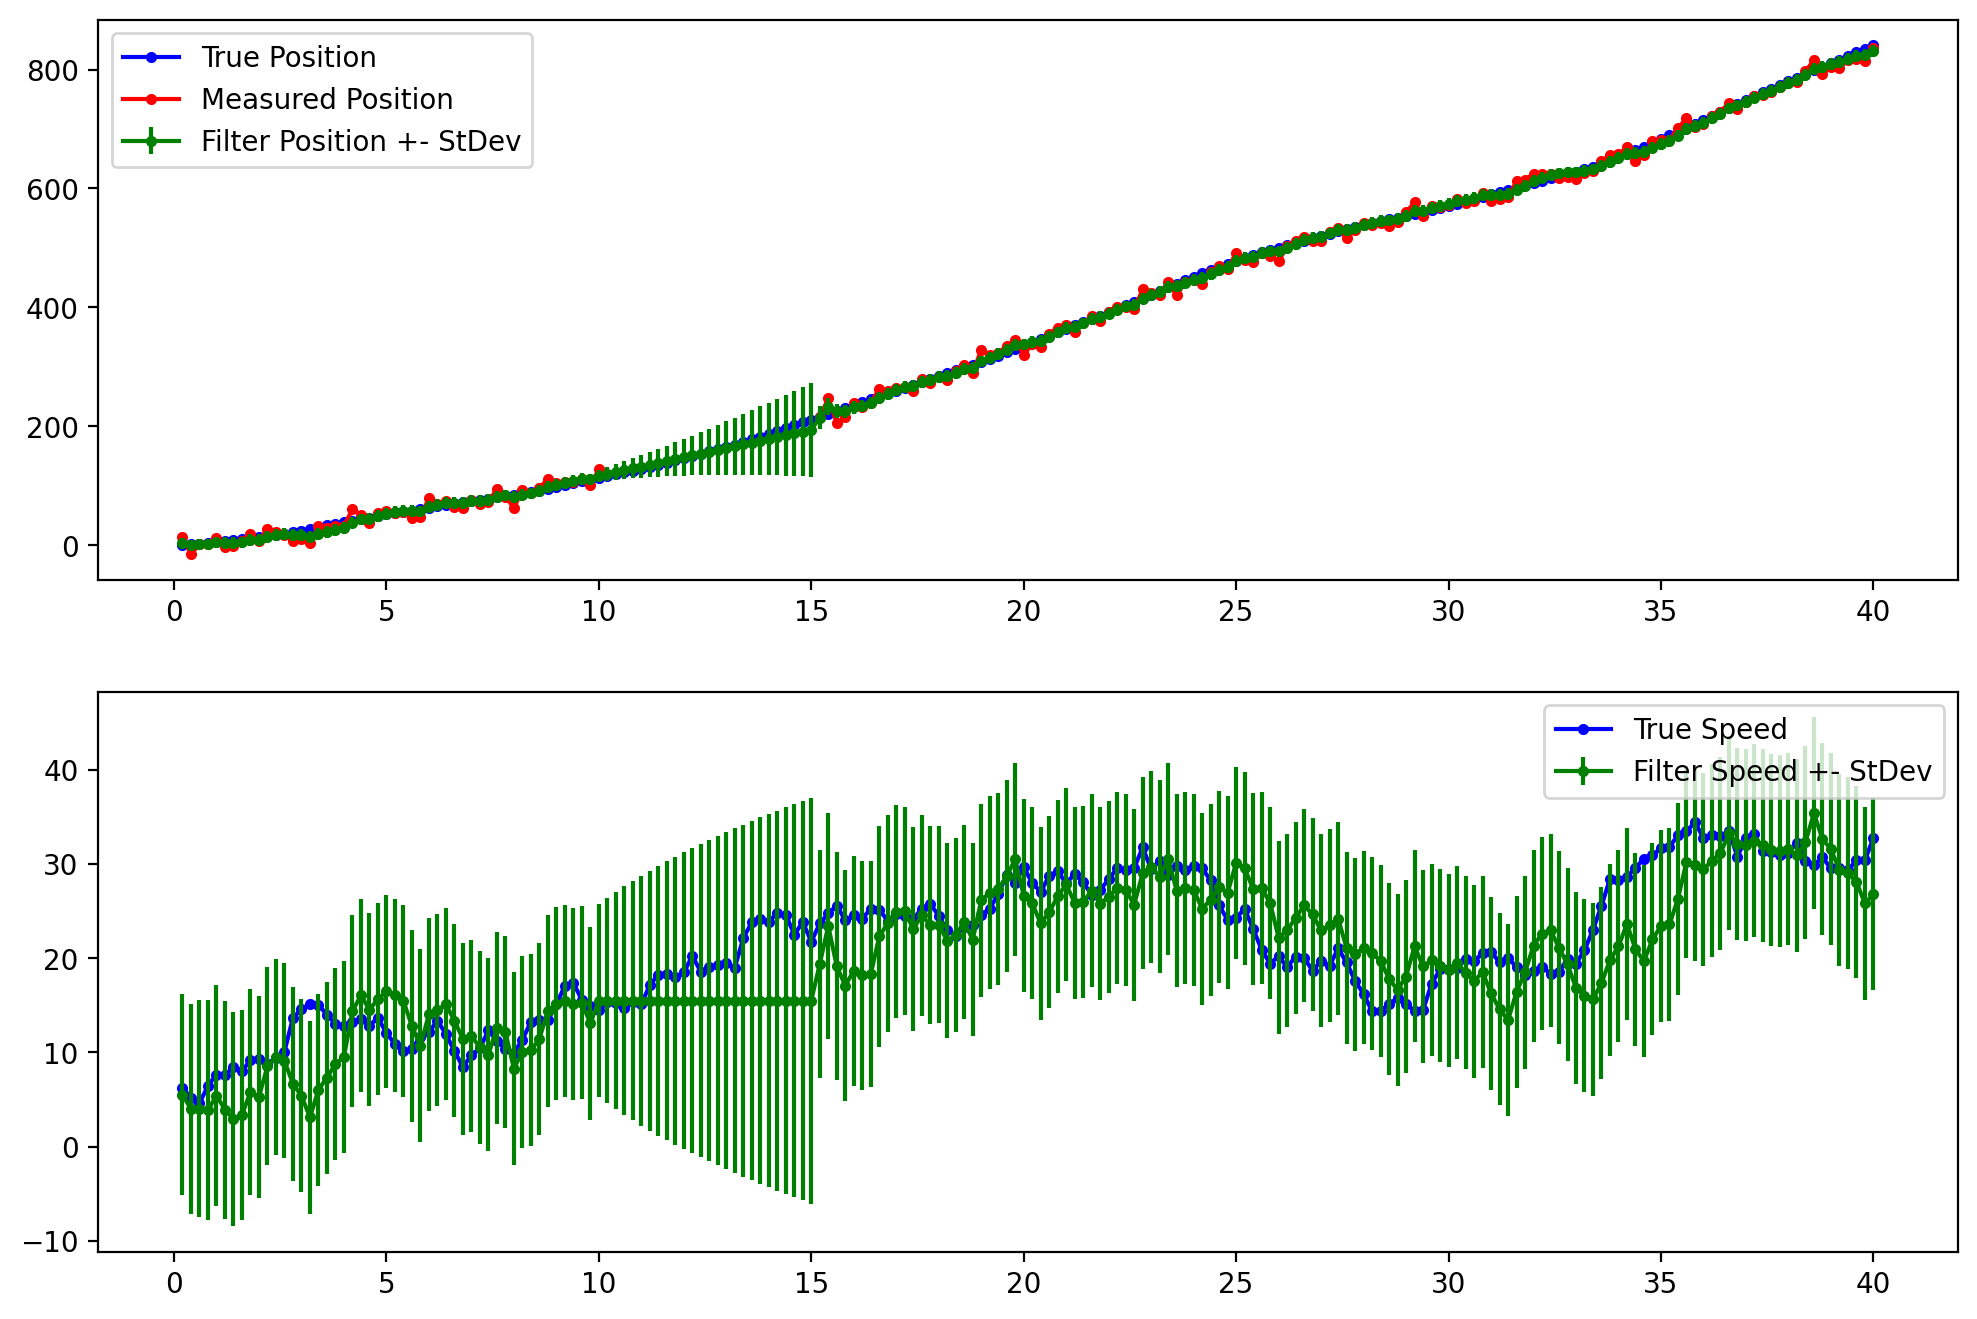

In [3]:
f = plt.figure(figsize=(12,8),dpi=200)

ax_x,ax_v = f.add_subplot(2,1,1),f.add_subplot(2,1,2)

ax_x.plot(t,x_train,'b.-',label='True Position')
ax_x.plot(t,x_measured,'r.-',label='Measured Position')
ax_x.errorbar(t,x_filter,yerr=sigmax_filter,color='g',marker='.',label='Filter Position +- StDev')
ax_x.legend()

ax_v.plot(t,v_train,'b.-',label='True Speed')
ax_v.errorbar(t,v_filter,yerr=sigmav_filter,color='g',marker='.',label='Filter Speed +- StDev')
ax_v.legend()